In [2]:
from qumba.solve import parse, linear_independent
from qumba.qcode import QCode
from qumba.csscode import *

In [14]:
# Bring's code [[30,8,3]]

# Note these are not linearly independant matrices
# They contain one redundant check operator
Ax = parse("""
......1......1.......1.1...1..
.1.........11..1...........1..
.1....1..1....1.1.............
....1..1....1........1.......1
.....1..1.1.......11..........
...1....1.....11......1.......
.........1...1...1......11....
1.1.......1...............1..1
..1.1......1......1...1.......
.......1...............11.1.1.
...1.1..........1...1....1....
1................1.11.......1.
""")
Az = parse("""
......1.........1...1..1....1.
1............1...1...1.......1
..1........1...........1..11..
.....1....1.............111...
....1.1.......1......11.......
........1.1.1..1.............1
.1.....1.1..1...........1.....
....1..1..........11........1.
........11....1..1.1..........
.1...1.....1....1.1...........
...1.........1.1.........1.1..
1.11................1.1.......
""")

code = CSSCode(Ax=Ax, Az=Az)
print(code)

[[30, 8]]


In [20]:
# These are the permutation automorphisms of the code

perms = code.find_autos()
print(len(perms))

120


In [21]:
#duality = find_zx_duality(Ax, Az)
#print(duality)
found = code.find_zx_duality_for_cz()
print(len(found))

20


In [22]:
n = code.n
pairss = []
for duality in found:
    # find the qubit pairs where we apply CZ gates
    pairs = []
    remain = set(range(n))
    for i, j in enumerate(duality):
        assert duality[j] == i, "must be an involution"
        if i==j:
            # need an S gate here... let's skip these for now
            break
        if i<j:
            pairs.append((i, j))
    else:
        pairss.append(pairs)
print(len(pairss))

10


In [34]:
# here is the first one
print(pairss[0])

[(0, 17), (1, 11), (2, 9), (3, 25), (4, 7), (5, 15), (6, 23), (8, 10), (12, 18), (13, 20), (14, 26), (16, 27), (19, 29), (21, 28), (22, 24)]


In [23]:
# Here we check that these CZ's really do preserve the code,
# and show the encoded logical operator (in symplectic form).
code = code.to_qcode()
logicals = []
for pairs in pairss:
    # apply CZ on each pair
    dode = code
    for (i,j) in pairs:
        dode = dode.apply_CZ(i, j)
        #print(dode.get_params()) # check intermediate codes
        #print(dode.equiv(code))
    assert dode.is_equiv(code) # we are back where we started
    L = code.get_logical(dode) # encoded gate
    logicals.append(L)

In [36]:
# here is the first one
print(logicals[0])

[[1 . . . . . . . . . . . . . . .]
 [. 1 . . . . . . 1 . 1 . . . . .]
 [. . 1 . . . . . . . . . . . . .]
 [. . . 1 . . . . . . 1 . . . . .]
 [. . . . 1 . . . . . . . . . . .]
 [. . . . . 1 1 . 1 . . . 1 . . .]
 [. . . . . . 1 . . . . . . . . .]
 [. . . . 1 . . 1 1 . . . . . 1 .]
 [. . . . . . . . 1 . . . . . . .]
 [1 . . . 1 . 1 . . 1 1 . . . . .]
 [. . . . . . . . . . 1 . . . . .]
 [1 . 1 . . . . . 1 . . 1 . . . .]
 [. . . . . . . . . . . . 1 . . .]
 [. . . . 1 . . . . . . . . 1 . .]
 [. . . . . . . . . . . . . . 1 .]
 [. . . . . . 1 . . . . . . . . 1]]


In [28]:
space = SymplecticSpace(code.k)

render_expr ('CZ(4,5)', 'CZ(3,4)', 'CZ(3,7)', 'CZ(2,3)', 'CZ(2,4)', 'CZ(2,6)', 'CZ(1,5)', 'CZ(0,4)', 'CZ(0,5)')


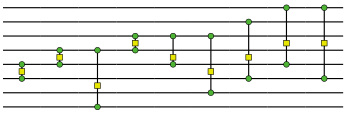

In [38]:
# This uses huygens to render (https://github.com/punkdit/huygens)
space.render(logicals[0], scale=4.)